<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')
boston_df=boston_df[boston_df.columns[1:]]

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1: Become familiar with the dataset

|Column|Description|
|-|-|
|CRIM | per capita crime rate by town|
|ZN | proportion of residential land zoned for lots over 25,000 sq.ft.|
|INDUS | proportion of non-retail business acres per town.|
|CHAS | Charles River dummy variable (1 if tract bounds river; 0 otherwise)|
|NOX | nitric oxides concentration (parts per 10 million)|
|RM | average number of rooms per dwelling|
|AGE | proportion of owner-occupied units built prior to 1940|
|DIS| weighted distances to five Boston employment centres|
|RAD | index of accessibility to radial highways|
|TAX | full-value property-tax rate per $10,000|
|PTRATIO | pupil-teacher ratio by town|
|LSTAT | % lower status of the population|
|MEDV | Median value of owner-occupied homes in $1000's|

In [3]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


## Task 2: Generate Descriptive Statistics and Visualizations
Objective:
* For the "Median value of owner-occupied homes" provide a boxplot
* Provide a  bar plot for the Charles river variable
* Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
* Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
* Create a histogram for the pupil to teacher ratio variable

21.2


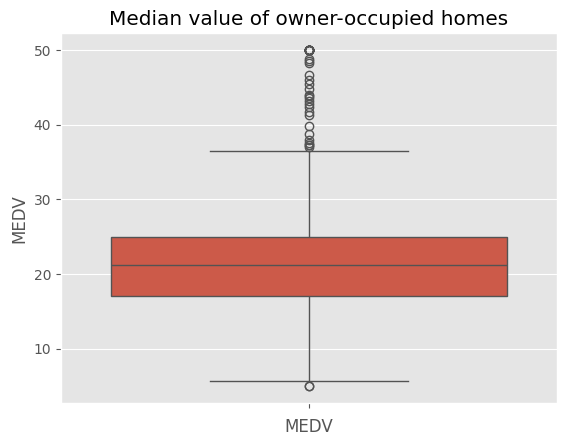

In [5]:
#"Median value of owner-occupied homes" provide a boxplot
print(boston_df['MEDV'].median())
#boxplot:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sns.boxplot(boston_df,y='MEDV',showfliers=True)
plt.xlabel('MEDV')
plt.title("Median value of owner-occupied homes")
plt.show()

<b style="color:Yellow"> Explanation:</b>
The majority of homes have a median value concentrated between 17 and 25, with a median of around 20. However, the presence of several high-value outliers (median values of 50) indicates variability in the housing market, likely influenced by location, property size, or other factors. Further analysis could explore what drives these outliers and their relationship with other features in the dataset.

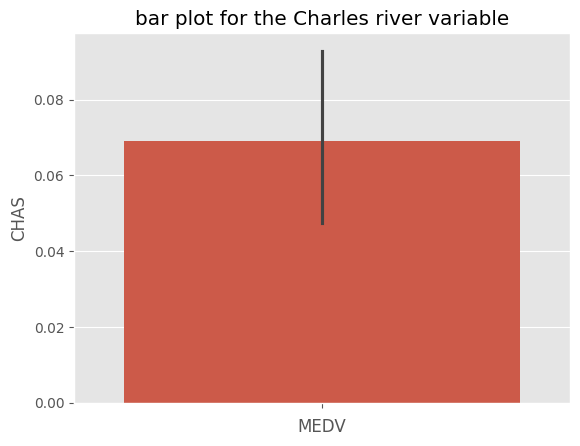

In [6]:
#Provide a  bar plot for the Charles river variable
sns.barplot(boston_df,y='CHAS')
plt.title("bar plot for the Charles river variable")
plt.xlabel('MEDV')
plt.show()

<b style="color:Yellow"> Explanation:</b>
The CHAS variable shows a stark imbalance, with most properties not adjacent to the Charles River. Further analysis can explore how adjacency to the river affects housing prices and whether the CHAS variable has a significant predictive impact on MEDV in regression models.

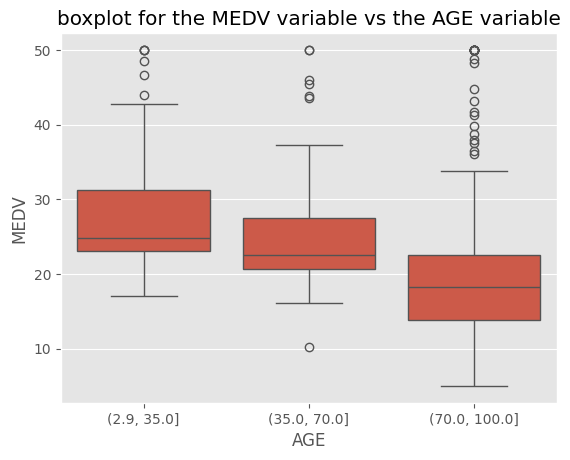

In [9]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df['coba']=pd.cut(boston_df['AGE'],[boston_df['AGE'].min(),35,70,boston_df['AGE'].max()])
boston_df['coba']
sns.boxplot(boston_df,y='MEDV',x='coba',showfliers=True)
plt.title("boxplot for the MEDV variable vs the AGE variable")
plt.xlabel('AGE')
plt.show()

<b style="color:Yellow"> Explanation:</b>
It is shown from the boxplot that from overall data distribution, the interquartile range tends to get lower for the median value of owner-occupied homes that having older age, where from the beginning its arround 20 - 30 for the group of age <35, followed by in range 20- 27 for the group age of 35 - 70 and get lower median value of owner occupied for the group of age >70 with the value 15 -24
 

PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241532e-98))


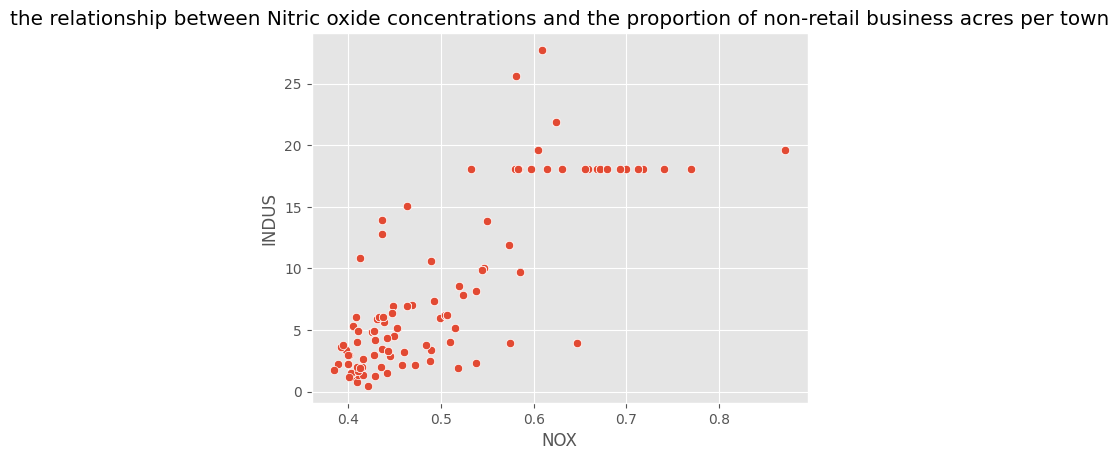

In [8]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
sns.scatterplot(boston_df,x='NOX',y='INDUS')
plt.title("the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
print(scipy.stats.pearsonr(x=boston_df['INDUS'],y=boston_df['NOX']))

<b style="color:Yellow"> Explanation:</b>
we can see from scatter plot there is positive linear pattern also supported by the result of pearson correlation calculation result 0.76 also shown significance relation between Nitric oxide concentrations and the proportion of non retail business acres pertown with p-value below 0.005

Text(0.5, 1.0, 'histogram for the pupil to teacher ratio variable')

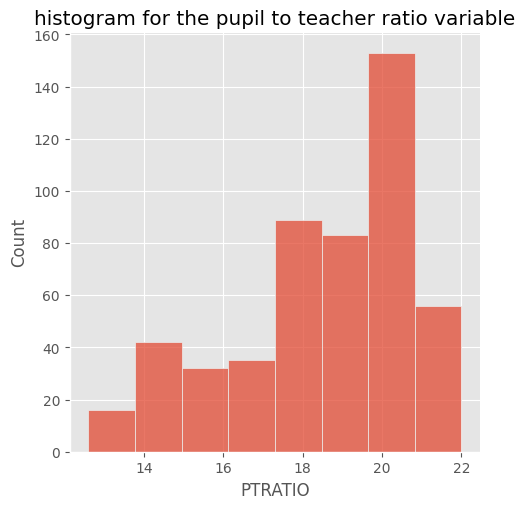

In [12]:
#Create a histogram for the pupil to teacher ratio variable
sns.displot(boston_df,x='PTRATIO',bins=8)
plt.title("histogram for the pupil to teacher ratio variable")

<b style="color:Yellow"> Explanation:</b>
The pupil to teacher ratio histogram can be seen as left skewed distribution the distribution tends to be arround 18-21 with 20 as the mode with 140 count followed by 18

## Task 3: Use the appropriate tests to answer the questions provided.
### Objective:
* Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
* Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
* Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
* What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#### Note:
1. State your hypothesis.
2. Use α = 0.05
3. Perform the test Statistics.
4. State the conclusion from the test.

In [16]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
print("H0: There is no significant difference in median value of houses bounded by the Charles river")
print("H1: There is significant difference in median value of houses bounded by the Charles river")
boston_df['CHAS']
#boston_df['MEDV']
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],boston_df[boston_df['CHAS']==1]['MEDV'])
#scipy.stats.zscore(boston_df[boston_df['CHAS']==0]['MEDV'],boston_df[boston_df['CHAS']==1]['MEDV'])




H0: There is no significant difference in median value of houses bounded by the Charles river


TtestResult(statistic=np.float64(-3.996437466090509), pvalue=np.float64(7.390623170519905e-05), df=np.float64(504.0))

Since the p-value is far below the significance threshold of 0.05, we reject the null hypothesis (H₀). The negative test statistic indicates that houses bounded by the Charles River have a statistically significantly lower median value than those not bounded by the river.This suggests a potential impact of proximity to the Charles River on property values, warranting further analysis to understand the underlying factors.

In [27]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
print("H0: There is no difference in Median values of houses for each proportion of owner occupied units built prior to 1940")
print("H1: There is difference in Median values of houses for each proportion of owner occupied units built prior to 1940")
boston_df['agecut']=pd.cut(boston_df['AGE'],[boston_df['AGE'].min(),35,70,boston_df['AGE'].max()])
boston_df['agecut']
a,b,c=boston_df[boston_df['AGE']<35]['MEDV'],boston_df[boston_df['AGE']>70]['MEDV'],boston_df[(boston_df['AGE']>35)&(boston_df['AGE']<70)]['MEDV']
F,p=scipy.stats.f_oneway(a,b,c)
print(F)
print(p)

H0: There is no difference in Median values of houses for each proportion of owner occupied units built prior to 1940
36.40764999196599
1.7105011022702984e-15


Since the p-value is far below a typical significance threshold of 0.05, we reject the null hypothesis (H₀). This indicates that there are statistically significant differences in the median house values among the three age groups.

The high F-statistic (36.41) further supports the existence of meaningful differences across the groups. This suggests that the proportion of older houses (by AGE category) is strongly associated with variations in housing values.

In [3]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
print("H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")
print("H0: There is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")
#scipy.stats.pearsonr()
scipy.stats.pearsonr(x=boston_df['INDUS'],y=boston_df['NOX'])

H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town


PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241532e-98))

Since the p-value is far below a typical significance threshold (e.g., 0.05), we reject the null hypothesis (H₀). This indicates that there is a statistically significant relationship between Nitric Oxide concentrations and the proportion of non-retail business acres per town.

The correlation coefficient of 0.764 suggests a strong positive relationship, meaning that as the proportion of non-retail business acres increases, Nitric Oxide concentrations also tend to increase.

In [4]:
# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
print("")
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 22 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        12:50:58   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Key Findings:
Regression Coefficient for DIS:

Coefficient: 1.0916
Interpretation: For every unit increase in weighted distance to the employment centers, the median home value increases by approximately 1.09 units, holding all else constant. This suggests that houses located farther from employment centers tend to have higher median values.
Statistical Significance:

P-value for DIS: 0.000
Since the p-value is well below 0.05, the relationship between DIS and MEDV is statistically significant. This indicates strong evidence to reject the null hypothesis that there is no association between the two variables.
Model Fit:

The R-squared value is 0.062, meaning only 6.2% of the variation in median home values is explained by the weighted distance to employment centers. While the relationship is statistically significant, the model explains only a small portion of the variability in home values, suggesting that other factors also play an important role.
Intercept (Constant):

The intercept (const) is 18.3901, representing the estimated median home value when the weighted distance is zero.
Other Statistics:

F-statistic: 33.58 with a p-value of 1.21e-08, indicating that the overall model is statistically significant.
Durbin-Watson: 0.570, which might suggest potential autocorrelation in the residuals.
Conclusion:
While the analysis finds a statistically significant positive relationship between the weighted distance to employment centers and median home values, the low R-squared value indicates that this relationship is not the sole or dominant factor influencing housing prices. Other factors likely contribute to variations in home values and should be investigated further.